In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
%matplotlib inline

rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
dongjak=pd.read_excel('dongjak_df.xlsx')
dongjak

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
0,4,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,편의점,6894431277,1435507,5130392482,1764038795,4608076122,2286355155,1088731,346776,4367907735,2050045528,422964768
1,10,노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3172713334,599169,2355001372,817711962,2211776404,960936930,455943,143226,1812610394,1010685934,303054534
2,16,상도1동,43780.404901,2191.099495,1349.096171,1384.671735,편의점,9163153507,1378877,6688928694,2474224813,5811310760,3341882314,1028355,350522,4711874200,3438502504,826564875
3,22,상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1399926801,216234,1025021344,374905457,939092244,458584911,160158,56076,703498830,533387852,141611571
4,28,상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,751538612,105285,525302440,226236172,498855325,252683287,73759,31526,366564124,302683764,71131057
5,34,상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,688203597,95361,481997836,206205761,455573650,232629947,67092,28269,322024295,306573636,56228726
6,40,흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2615675415,441728,1947475879,668199536,1682842272,917039733,337485,104243,1210895331,1022134202,312658586
7,46,사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4176316832,646668,3013557969,1162758863,2700218480,1469804511,472843,173825,2437419059,1400663348,299242733
8,52,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2191681672,331393,1557031148,634650524,1448306548,738727048,237877,93516,1024836694,877990312,252015537
9,58,사당3동,18666.811610,608.635897,701.916949,770.962451,편의점,1070377529,168278,778464707,291912822,673336282,385943412,123820,44458,495093784,419943073,122786982


In [2]:
dongjak=dongjak.drop(columns=['Unnamed: 0'])

In [3]:
dongjak.set_index('행정동')

,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,업종명,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
행정동,,,,,,,,,,,,,,,,
노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,편의점,6894431277,1435507,5130392482,1764038795,4608076122,2286355155,1088731,346776,4367907735,2050045528,422964768
노량진2동,17718.987732,918.453401,632.918150,641.068136,편의점,3172713334,599169,2355001372,817711962,2211776404,960936930,455943,143226,1812610394,1010685934,303054534
상도1동,43780.404901,2191.099495,1349.096171,1384.671735,편의점,9163153507,1378877,6688928694,2474224813,5811310760,3341882314,1028355,350522,4711874200,3438502504,826564875
상도2동,20403.718412,760.888892,760.197387,714.112982,편의점,1399926801,216234,1025021344,374905457,939092244,458584911,160158,56076,703498830,533387852,141611571
상도3동,16516.393565,665.456764,595.564459,672.713470,편의점,751538612,105285,525302440,226236172,498855325,252683287,73759,31526,366564124,302683764,71131057
상도4동,18707.006306,698.543446,681.121447,731.503520,편의점,688203597,95361,481997836,206205761,455573650,232629947,67092,28269,322024295,306573636,56228726
흑석동,35234.993160,1719.288960,1103.227731,966.916628,편의점,2615675415,441728,1947475879,668199536,1682842272,917039733,337485,104243,1210895331,1022134202,312658586
사당1동,22714.892651,1187.683986,791.024475,782.488288,편의점,4176316832,646668,3013557969,1162758863,2700218480,1469804511,472843,173825,2437419059,1400663348,299242733
사당2동,31741.638882,1099.054708,1222.998539,1250.519451,편의점,2191681672,331393,1557031148,634650524,1448306548,738727048,237877,93516,1024836694,877990312,252015537


In [4]:
dongjak=dongjak.drop(columns=['업종명'])

In [5]:
dongjak

,행정동,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
0,노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,6894431277,1435507,5130392482,1764038795,4608076122,2286355155,1088731,346776,4367907735,2050045528,422964768
1,노량진2동,17718.987732,918.453401,632.918150,641.068136,3172713334,599169,2355001372,817711962,2211776404,960936930,455943,143226,1812610394,1010685934,303054534
2,상도1동,43780.404901,2191.099495,1349.096171,1384.671735,9163153507,1378877,6688928694,2474224813,5811310760,3341882314,1028355,350522,4711874200,3438502504,826564875
3,상도2동,20403.718412,760.888892,760.197387,714.112982,1399926801,216234,1025021344,374905457,939092244,458584911,160158,56076,703498830,533387852,141611571
4,상도3동,16516.393565,665.456764,595.564459,672.713470,751538612,105285,525302440,226236172,498855325,252683287,73759,31526,366564124,302683764,71131057
5,상도4동,18707.006306,698.543446,681.121447,731.503520,688203597,95361,481997836,206205761,455573650,232629947,67092,28269,322024295,306573636,56228726
6,흑석동,35234.993160,1719.288960,1103.227731,966.916628,2615675415,441728,1947475879,668199536,1682842272,917039733,337485,104243,1210895331,1022134202,312658586
7,사당1동,22714.892651,1187.683986,791.024475,782.488288,4176316832,646668,3013557969,1162758863,2700218480,1469804511,472843,173825,2437419059,1400663348,299242733
8,사당2동,31741.638882,1099.054708,1222.998539,1250.519451,2191681672,331393,1557031148,634650524,1448306548,738727048,237877,93516,1024836694,877990312,252015537
9,사당3동,18666.811610,608.635897,701.916949,770.962451,1070377529,168278,778464707,291912822,673336282,385943412,123820,44458,495093784,419943073,122786982


In [6]:
dongjak=dongjak.set_index('행정동')

In [7]:
dongjak

,총생활인구,청년층생활인구,중년층생활인구,노년층생활인구,당월매출,당월매출건수,주중매출,주말매출,남성매출,여성매출,주중매출건수,주말매출건수,청년층매출,중년층매출,노년층매출
행정동,,,,,,,,,,,,,,,
노량진1동,35414.592129,2138.137898,1087.947435,1001.271798,6894431277,1435507,5130392482,1764038795,4608076122,2286355155,1088731,346776,4367907735,2050045528,422964768
노량진2동,17718.987732,918.453401,632.918150,641.068136,3172713334,599169,2355001372,817711962,2211776404,960936930,455943,143226,1812610394,1010685934,303054534
상도1동,43780.404901,2191.099495,1349.096171,1384.671735,9163153507,1378877,6688928694,2474224813,5811310760,3341882314,1028355,350522,4711874200,3438502504,826564875
상도2동,20403.718412,760.888892,760.197387,714.112982,1399926801,216234,1025021344,374905457,939092244,458584911,160158,56076,703498830,533387852,141611571
상도3동,16516.393565,665.456764,595.564459,672.713470,751538612,105285,525302440,226236172,498855325,252683287,73759,31526,366564124,302683764,71131057
상도4동,18707.006306,698.543446,681.121447,731.503520,688203597,95361,481997836,206205761,455573650,232629947,67092,28269,322024295,306573636,56228726
흑석동,35234.993160,1719.288960,1103.227731,966.916628,2615675415,441728,1947475879,668199536,1682842272,917039733,337485,104243,1210895331,1022134202,312658586
사당1동,22714.892651,1187.683986,791.024475,782.488288,4176316832,646668,3013557969,1162758863,2700218480,1469804511,472843,173825,2437419059,1400663348,299242733
사당2동,31741.638882,1099.054708,1222.998539,1250.519451,2191681672,331393,1557031148,634650524,1448306548,738727048,237877,93516,1024836694,877990312,252015537


<function matplotlib.pyplot.show(close=None, block=None)>

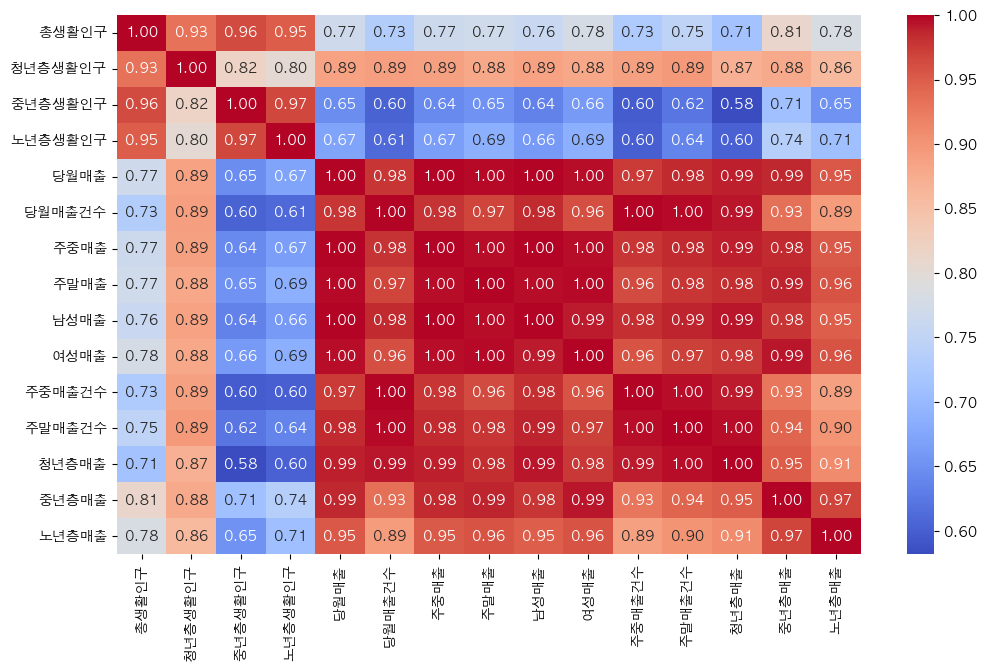

In [8]:

corr=dongjak.corr()
plt.figure(figsize=(12, 7))
a=sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', xticklabels=dongjak.columns)
a
plt.show

In [9]:
dongjak.columns

Index(['총생활인구', '청년층생활인구', '중년층생활인구', '노년층생활인구', '당월매출', '당월매출건수', '주중매출',
       '주말매출', '남성매출', '여성매출', '주중매출건수', '주말매출건수', '청년층매출', '중년층매출', '노년층매출'],
      dtype='object')

총생활인구, 청년층매출

In [10]:
dongjak=dongjak.drop(columns=['총생활인구',  '당월매출', '당월매출건수', '주중매출',
       '주말매출', '주중매출건수', '주말매출건수'],axis=1)

In [11]:
dongjak

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출
행정동,,,,,,,,
노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534
상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537


In [12]:
dongjak.corr() #청년층생활인구와 청년층매출간의 상관관계

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출
청년층생활인구,1.000000,0.817808,0.802448,0.886987,0.880605,0.869636,0.878951,0.857725
중년층생활인구,0.817808,1.000000,0.967290,0.635552,0.661656,0.581887,0.710132,0.651753
노년층생활인구,0.802448,0.967290,1.000000,0.660780,0.687992,0.602060,0.736110,0.708295
남성매출,0.886987,0.635552,0.660780,1.000000,0.991649,0.992425,0.978147,0.948949
여성매출,0.880605,0.661656,0.687992,0.991649,1.000000,0.977068,0.992252,0.957236
청년층매출,0.869636,0.581887,0.602060,0.992425,0.977068,1.000000,0.949409,0.909657
중년층매출,0.878951,0.710132,0.736110,0.978147,0.992252,0.949409,1.000000,0.967587
노년층매출,0.857725,0.651753,0.708295,0.948949,0.957236,0.909657,0.967587,1.000000


In [13]:
dongjak

,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출
행정동,,,,,,,,
노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768
노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534
상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875
상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571
상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057
상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726
흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586
사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733
사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537


# 주택유형(세대수) 데이터

In [14]:
building=pd.read_csv('서울특별시 동작구_주택유형별 위치 정보 및 세대수 현황_20220818.csv',encoding='cp949')
building

,연번,분류,건물명,행정동,주소,세대수,위도,경도
0,1,아파트,노량진우성,노량진1동,서울특별시 동작구 만양로8길 50,901,37.510304,126.946866
1,2,아파트,노량진삼익,노량진1동,서울특별시 동작구 만양로 84,175,37.511367,126.945226
2,3,아파트,"신동아리버파크\r(분양 1,696,임대 925)",노량진1동,서울특별시 동작구 만양로 19,2621,37.507073,126.945718
3,4,아파트,노량진쌍용예가,노량진1동,서울특별시 동작구 장승배기로16길 134,299,37.510265,126.943676
4,5,아파트,형인한강,노량진1동,서울특별시 동작구 만양로 36,73,37.507664,126.948235
...,...,...,...,...,...,...,...,...
165,166,연립주택,유성,사당5동,서울특별시 동작구 사당로10길 1,24,37.484815,126.970192
166,167,연립주택,신남성연립,사당5동,서울특별시 동작구 사당로2가길 131,36,37.489332,126.964193
167,168,연립주택,연우연립,사당5동,서울특별시 동작구 사당로8길 68,21,37.482790,126.967112
168,169,연립주택,능내연립,사당5동,서울특별시 동작구 사당로8길 39,22,37.483599,126.968672


In [15]:
building['행정동'].value_counts()

행정동
신대방2동         15
상도1동          14
상도2동          14
대방동           14
사당5동          13
흑석동           13
사당3동          13
본동             9
신대방1동          9
사당2동           7
노량진1동          6
상도4동           6
동작동            6
상도4동           4
사당4동           4
사당1동           4
사당동\r(동작동)     3
상도3동           3
노량진2동          2
신대방2동\r        2
본동             1
상도2동           1
상도3동           1
상도1동\r         1
사당1동           1
사당3동           1
사당4동           1
사당5동           1
대방동            1
Name: count, dtype: int64

In [16]:
building.groupby('행정동').agg({'세대수':'mean'}).sort_values(by='세대수',ascending=False)

,세대수
행정동,
노량진1동,683.500000
사당2동,625.714286
상도2동,562.857143
상도1동,538.285714
흑석동,537.615385
신대방1동,514.444444
사당동\r(동작동),452.666667
대방동,447.285714
상도1동\r,405.000000


In [17]:
building1=pd.read_csv('서울특별시 동작구_공공주택현황_20220825.csv',encoding='cp949')
building1

,연번,추진방식,대상,시군구,소재지,세대수,추진현황,공급시기,비고,기준일자
0,1,SH매입형,모자안심,서울특별시 동작구,상도3동,26,공급완료,2015-11-01,NaN,2022-08-25
1,2,SH매입형,홀몸어르신,서울특별시 동작구,상도4동,27,공급완료,2017-11-01,NaN,2022-08-25
2,3,SH매입형,신혼부부,서울특별시 동작구,상도3동,10,공급완료,2018-11-01,NaN,2022-08-25
3,4,SH매입형,청년,서울특별시 동작구,대방동,56,공급완료,2018-11-01,NaN,2022-08-25
4,5,SH매입형,신혼부부,서울특별시 동작구,상도4동,10,공급완료,2019-09-01,NaN,2022-08-25
5,6,SH매입형,청년,서울특별시 동작구,상도4동,15,공급완료,2020-03-01,NaN,2022-08-25
6,7,SH매입형,청년,서울특별시 동작구,상도1동,19,공급완료,2020-12-01,NaN,2022-08-25
7,8,SH매입형,청년/신혼부부,서울특별시 동작구,상도4동,31,공급완료,2020-10-01,NaN,2022-08-25
8,9,SH매입형,청년,서울특별시 동작구,대방동,16,공급완료,2021-06-01,NaN,2022-08-25
9,10,SH매입형,청년,서울특별시 동작구,사당4동,19,공급완료,2021-09-01,NaN,2022-08-25


# 동작구 학원교습소정보 데이터

In [18]:
academy=pd.read_csv('서울특별시 동작구_학원교습소정보_20211017.csv',encoding='cp949')
academy

,행정구역명,학원-교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,정원합계,일시수용능력인원합계,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,개설일자,적재일시
0,동작구,학원,1000036820,대성학원,서울특별시 동작구 노량진로 120,/ 1층~6층 (노량진동/대성학원),입시.검정 및 보습,보통교과,보습/,보습,1200,3029.0,NaN,Y,N,156800,개원,1965-04-23,1965-04-23,2021-10-17
1,동작구,학원,1000036979,아하브음악학원,서울특별시 동작구 흑석로 11,/ 3층 (상도1동/ 열린우리교회),예능(대),예능(중),음악/,음악,162,54.0,NaN,N,N,156830,개원,1979-10-08,1979-10-08,2021-10-17
2,동작구,학원,1000037115,대산전기학원,서울특별시 동작구 노량진로 104,/ 13층,직업기술,산업기반기술,전기/,전기,1015,210.0,NaN,Y,N,6928,개원,1981-01-31,1981-01-31,2021-10-31
3,동작구,학원,1000037447,박문각경찰학원,서울특별시 동작구 노량진로 161,/ 2~3층 (노량진동),인문사회(대),인문사회(중),성인고시/,성인고시,48700,238.0,NaN,Y,N,6902,개원,1985-09-25,1985-09-25,2021-10-17
4,동작구,학원,1000037463,아람컴퓨터학원,서울특별시 동작구 동작대로29길 119,우성2단지 상가 404(사당동),직업기술,컴퓨터,컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,컴퓨터(정보처리/통신기기/인터넷/소프트웨어),600,60.0,NaN,N,N,156772,개원,1985-12-28,1985-12-28,2021-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,동작구,학원,9206,신서울학원,서울특별시 동작구 동작대로29길115,우성상가4층(사당동,입시.검정 및 보습,보통교과,보습/,보습,280,70.0,NaN,N,NaN,156772,개원,2005-04-08,2005-04-08,2021-10-17
939,동작구,학원,922,패스원독서실,서울특별시 동작구 만양로14나길 10,1-2층 (노량진동),독서실,독서실(중),독서실(일반인)/,독서실(일반인),369,123.0,NaN,N,N,156801,개원,2002-10-09,2002-10-09,2021-10-17
940,동작구,학원,9471,제이정의보습학원,서울특별시 동작구 서달로 146,3층(흑석동),입시.검정 및 보습,보통교과,보습/,보습,1200,150.0,NaN,N,N,156859,개원,2005-04-21,2005-04-21,2021-10-17
941,동작구,교습소,9636,신대방사랑피아노교습소,서울특별시 동작구 여의대방로10길 13,한성아파트 상가동201 (신대방동),예능(대),예능(중),초급피아노1,음악,28,4.0,초급피아노1:150000/ 초급피아노2:140000/ 중급피아노1:160000/ 중...,Y,N,156850,개원,2005-05-04,2005-05-04,2021-10-17


In [19]:
location_pattern=r'(\S+) (\S+) (\S+)' 
academy[['시','구','지번']]=academy['도로명주소'].str.extract(location_pattern) # 서울특별시 동작구 동작대로29길115	

In [20]:
academy

,행정구역명,학원-교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,개설일자,적재일시,시,구,지번
0,동작구,학원,1000036820,대성학원,서울특별시 동작구 노량진로 120,/ 1층~6층 (노량진동/대성학원),입시.검정 및 보습,보통교과,보습/,보습,...,Y,N,156800,개원,1965-04-23,1965-04-23,2021-10-17,서울특별시,동작구,노량진로
1,동작구,학원,1000036979,아하브음악학원,서울특별시 동작구 흑석로 11,/ 3층 (상도1동/ 열린우리교회),예능(대),예능(중),음악/,음악,...,N,N,156830,개원,1979-10-08,1979-10-08,2021-10-17,서울특별시,동작구,흑석로
2,동작구,학원,1000037115,대산전기학원,서울특별시 동작구 노량진로 104,/ 13층,직업기술,산업기반기술,전기/,전기,...,Y,N,6928,개원,1981-01-31,1981-01-31,2021-10-31,서울특별시,동작구,노량진로
3,동작구,학원,1000037447,박문각경찰학원,서울특별시 동작구 노량진로 161,/ 2~3층 (노량진동),인문사회(대),인문사회(중),성인고시/,성인고시,...,Y,N,6902,개원,1985-09-25,1985-09-25,2021-10-17,서울특별시,동작구,노량진로
4,동작구,학원,1000037463,아람컴퓨터학원,서울특별시 동작구 동작대로29길 119,우성2단지 상가 404(사당동),직업기술,컴퓨터,컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,컴퓨터(정보처리/통신기기/인터넷/소프트웨어),...,N,N,156772,개원,1985-12-28,1985-12-28,2021-10-17,서울특별시,동작구,동작대로29길
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,동작구,학원,9206,신서울학원,서울특별시 동작구 동작대로29길115,우성상가4층(사당동,입시.검정 및 보습,보통교과,보습/,보습,...,N,NaN,156772,개원,2005-04-08,2005-04-08,2021-10-17,서울특별시,동작구,동작대로29길115
939,동작구,학원,922,패스원독서실,서울특별시 동작구 만양로14나길 10,1-2층 (노량진동),독서실,독서실(중),독서실(일반인)/,독서실(일반인),...,N,N,156801,개원,2002-10-09,2002-10-09,2021-10-17,서울특별시,동작구,만양로14나길
940,동작구,학원,9471,제이정의보습학원,서울특별시 동작구 서달로 146,3층(흑석동),입시.검정 및 보습,보통교과,보습/,보습,...,N,N,156859,개원,2005-04-21,2005-04-21,2021-10-17,서울특별시,동작구,서달로
941,동작구,교습소,9636,신대방사랑피아노교습소,서울특별시 동작구 여의대방로10길 13,한성아파트 상가동201 (신대방동),예능(대),예능(중),초급피아노1,음악,...,Y,N,156850,개원,2005-05-04,2005-05-04,2021-10-17,서울특별시,동작구,여의대방로10길


In [21]:
academy.columns

Index(['행정구역명', '학원-교습소', '학원지정번호', '학원명', '도로명주소', '도로명상세주소', '분야명', '교습계열명',
       '교습과정목록명', '교습과정명', '정원합계', '일시수용능력인원합계', '인당수강료내용', '수강료공개여부',
       '기숙사학원여부', '도로명우편번호', '등록상태명', '등록일자', '개설일자', '적재일시', '시', '구', '지번'],
      dtype='object')

In [22]:
academy=academy.drop(columns=['행정구역명', '학원-교습소', '학원지정번호','도로명주소', '분야명', '교습계열명',
       '교습과정목록명', '교습과정명', '일시수용능력인원합계', '인당수강료내용', '수강료공개여부',
       '기숙사학원여부', '도로명우편번호', '등록상태명', '등록일자', '개설일자', '적재일시','시','구'])



In [23]:
a=academy['도로명상세주소'].str.split('(').str[1]
a
df=pd.DataFrame(a)

In [24]:
df

,도로명상세주소
0,노량진동/대성학원)
1,상도1동/ 열린우리교회)
2,NaN
3,노량진동)
4,사당동)
...,...
938,사당동
939,노량진동)
940,흑석동)
941,신대방동)


In [25]:
academy['행정동']=academy['도로명상세주소'].str.extract(r'(\b[가-힣]+동\b)') #도로명상세주소에서 행정동 추출하기
academy

,학원명,도로명상세주소,정원합계,지번,행정동
0,대성학원,/ 1층~6층 (노량진동/대성학원),1200,노량진로,노량진동
1,아하브음악학원,/ 3층 (상도1동/ 열린우리교회),162,흑석로,NaN
2,대산전기학원,/ 13층,1015,노량진로,NaN
3,박문각경찰학원,/ 2~3층 (노량진동),48700,노량진로,노량진동
4,아람컴퓨터학원,우성2단지 상가 404(사당동),600,동작대로29길,사당동
...,...,...,...,...,...
938,신서울학원,우성상가4층(사당동,280,동작대로29길115,사당동
939,패스원독서실,1-2층 (노량진동),369,만양로14나길,노량진동
940,제이정의보습학원,3층(흑석동),1200,서달로,흑석동
941,신대방사랑피아노교습소,한성아파트 상가동201 (신대방동),28,여의대방로10길,신대방동


In [26]:
academy

,학원명,도로명상세주소,정원합계,지번,행정동
0,대성학원,/ 1층~6층 (노량진동/대성학원),1200,노량진로,노량진동
1,아하브음악학원,/ 3층 (상도1동/ 열린우리교회),162,흑석로,NaN
2,대산전기학원,/ 13층,1015,노량진로,NaN
3,박문각경찰학원,/ 2~3층 (노량진동),48700,노량진로,노량진동
4,아람컴퓨터학원,우성2단지 상가 404(사당동),600,동작대로29길,사당동
...,...,...,...,...,...
938,신서울학원,우성상가4층(사당동,280,동작대로29길115,사당동
939,패스원독서실,1-2층 (노량진동),369,만양로14나길,노량진동
940,제이정의보습학원,3층(흑석동),1200,서달로,흑석동
941,신대방사랑피아노교습소,한성아파트 상가동201 (신대방동),28,여의대방로10길,신대방동


In [27]:
academy=academy.drop(columns=['도로명상세주소'])
academy

,학원명,정원합계,지번,행정동
0,대성학원,1200,노량진로,노량진동
1,아하브음악학원,162,흑석로,NaN
2,대산전기학원,1015,노량진로,NaN
3,박문각경찰학원,48700,노량진로,노량진동
4,아람컴퓨터학원,600,동작대로29길,사당동
...,...,...,...,...
938,신서울학원,280,동작대로29길115,사당동
939,패스원독서실,369,만양로14나길,노량진동
940,제이정의보습학원,1200,서달로,흑석동
941,신대방사랑피아노교습소,28,여의대방로10길,신대방동


In [28]:
academy['행정동'].isna().sum()

133

In [29]:
academy['행정동'].value_counts()
#사당동, 상도동, 노량진동, 대방동, 신대방동, 흑석동

행정동
사당동              181
상도동              155
노량진동             152
대방동              131
신대방동              69
흑석동               46
상가동               29
본동                13
에이동               10
건영아파트상가동           3
비동                 3
동작동                3
본동신동아아파트상가동        3
가동                 2
나동                 2
흑성동                1
한성아파트상가동           1
보라매파크빌아파트상가동       1
상도파크자이상가동          1
브라운스톤상도상가동         1
봉천우성아파트상가동         1
신동아리버파크아파트상가동      1
한강현대아파트상가동         1
Name: count, dtype: int64

In [30]:
dongjak.index

Index(['노량진1동', '노량진2동', '상도1동', '상도2동', '상도3동', '상도4동', '흑석동', '사당1동', '사당2동',
       '사당3동', '사당4동', '사당5동', '대방동', '신대방1동', '신대방2동'],
      dtype='object', name='행정동')

앞선 데이터를 바탕으로 학원수 데이터프레임을 직점 생성 <br>
기존 학원 데이터의 행정동 값은 노량진1동, 노량진 2동과 같이 분류되어있는 것이 아니라 노량진동, 사당동과 같이 분류되어있으므로 <br>
이를 구분하기위해 임의로 학원 수 / 특정동의 세부동을 나눔 (ex:사당동 학원 수 181개 / (사당1동, 사당2동, 사당3동, 사당4동, 사당5동)=5)<br>

=> 사당 각 동마다 36개씩 학원이 분포되었다고 가정

In [31]:

data={'행정동':['노량진1동','노량진2동','상도1동','상도2동', '상도3동', '상도4동', '흑석동', 
                    '사당1동', '사당2동','사당3동', '사당4동', '사당5동', '대방동', '신대방1동', '신대방2동'],
            '학원수':[60,60,40,40,40,40,46,36,36,36,36,36,131,35,35]}
academy=pd.DataFrame(data)
academy

,행정동,학원수
0,노량진1동,60
1,노량진2동,60
2,상도1동,40
3,상도2동,40
4,상도3동,40
5,상도4동,40
6,흑석동,46
7,사당1동,36
8,사당2동,36
9,사당3동,36


In [32]:
dongjak=pd.merge(dongjak, academy, how='inner', on='행정동')

# 동작구 상권 데이터

In [33]:
store=pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202309.csv')

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_12352/2207983894.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  store=pd.read_csv('소상공인시장진흥공단_상가(상권)정보_서울_202309.csv')


In [34]:
store['도로명주소']  #서울특별시 중구 을지로42길 11	

0             서울특별시 광진구 면목로 172
1            서울특별시 중구 을지로42길 11
2           서울특별시 노원구 한글비석로 242
3             서울특별시 양천구 월정로 283
4             서울특별시 강서구 마곡동로 55
                  ...          
482954      서울특별시 강남구 논현로34길 32
482955       서울특별시 관악구 은천로 45-1
482956    서울특별시 구로구 구로동로26길 111
482957       서울특별시 송파구 풍성로 32-1
482958      서울특별시 광진구 자양로11길 11
Name: 도로명주소, Length: 482959, dtype: object

In [35]:
# location_pattern=r'(\S+) (\S+) (\S+)
# store[['도시','구','']]
dongjak_store=store[store['시군구명']=='동작구']
dongjak_store

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
15,MA010120220805431087,해치,NaN,G2,소매,G215,의약·화장품 소매,G21503,화장품 소매업,G47813,...,1159010900106920006002347,NaN,서울특별시 동작구 신대방3길 25,156854,7070,NaN,1,NaN,126.910341,37.487538
25,MA010120220805431721,119래미안로이파크공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1159010700101660013009002,래미안로이파크,서울특별시 동작구 사당로23길 112,156093,7001,NaN,1,NaN,126.973457,37.487788
44,MA010120220805432188,다사유,NaN,G2,소매,G222,중고 상품 소매,G22201,중고 상품 소매업,G47869,...,1159010500102790000014992,NaN,서울특별시 동작구 현충로14나길 2,156863,6983,NaN,NaN,NaN,126.969580,37.504901
68,MA010120220805433625,맥주창고오라고노량진점,NaN,I2,음식,I211,주점,I21104,요리 주점,I56219,...,1159010100101000001032356,NaN,서울특별시 동작구 노량진로 158,156800,6922,NaN,1,NaN,126.943526,37.513420
94,MA010120220805432581,승희분식,NaN,I2,음식,I210,기타 간이,I21007,김밥/만두/분식,I56194,...,1159010800103390015004998,NaN,서울특별시 동작구 노량진로 24,156808,6938,NaN,1,NaN,126.928331,37.512895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482756,MA0101202307A0097554,지에스25신사당광성,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010700110130014011047,NaN,서울특별시 동작구 사당로22길 12,156824,7012,NaN,1,NaN,126.976722,37.482968
482866,MA0101202307A0008516,다온헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,1159010900107070000003049,현대상가,서울특별시 동작구 여의대방로 30,156787,7064,NaN,1,NaN,126.911436,37.494648
482874,MA0101202307A0087330,오투원룸텔,NaN,I1,숙박,I102,기타 숙박,I10201,기숙사/고시원,I55901,...,1159010100100270010031794,NaN,서울특별시 동작구 노량진로 96,156052,6927,NaN,3,NaN,126.936314,37.513094
482886,MA0101202307A0055816,해남상회,NaN,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,1159010700100910177012238,NaN,서울특별시 동작구 동작대로29나길 10,156815,6997,NaN,1,NaN,126.980674,37.488391


In [36]:
동작편의점=dongjak_store[dongjak_store['상권업종소분류명']=='편의점']
동작편의점

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1657,MA010120220805481642,씨유흑석센트레빌점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010500102470002000001,흑석한강센트레빌2차,서울특별시 동작구 서달로 91,156794,6975,NaN,2,NaN,126.958973,37.503132
1936,MA010120220805490102,지에스S숭실대입구역점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010200105140000000001,가로판매대,서울특별시 동작구 상도로 365-2,156830,6978,NaN,NaN,NaN,126.953866,37.496275
2284,MA010120220805498776,씨유동작상도원룸점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010300104810001028750,NaN,서울특별시 동작구 상도로47길 107,156881,6969,NaN,1,NaN,126.951598,37.504004
2954,MA010120220805520930,GS25동작신라점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010900106860053003258,프레콘빌딩,서울특별시 동작구 시흥대로 602,156854,7074,NaN,1,NaN,126.904495,37.486006
3150,MA010120220805528902,응응스크르서울흑석점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010500100090077034607,NaN,서울특별시 동작구 현충로 106,156877,6979,NaN,2,NaN,126.965146,37.507421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477984,MA0101202307A0074955,지에스25S9노량진역점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010100100240001000001,9호선노량진역,서울특별시 동작구 노량진로 130,156800,6922,NaN,NaN,NaN,126.940809,37.513567
478131,MA0101202307A0000298,씨유보라매옴니,타워점,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010900103950062001752,삼성보라매옴니타워,서울특별시 동작구 보라매로5길 23,156712,7071,NaN,1,NaN,126.923612,37.492570
478795,MA0101202307A0046384,씨유상도,삼성점,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010200104550000027980,상도동래미안(1차)아파트,서울특별시 동작구 등용로 38,156032,6937,NaN,1,NaN,126.935213,37.506173
482756,MA0101202307A0097554,지에스25신사당광성,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1159010700110130014011047,NaN,서울특별시 동작구 사당로22길 12,156824,7012,NaN,1,NaN,126.976722,37.482968


# 동작구 편의점 시각화

In [37]:
import folium 
편의점_map=folium.Map(location=[동작편의점['위도'].mean(),동작편의점['경도'].mean()],zoom_start=12)
편의점_map

In [38]:
import json
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
# seoul_geo = json.load(open(jpath, encoding='utf-8'))


In [39]:
# m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)

# m.choropleth(
#     geo_data=state_geo,
#     name='인당소득',
#     data=동작편의점,
#     columns=['시군구명'],
#     key_on='feature.properties.name',
#     fill_color='Blues',
#     fill_opacity=0.7,
#     line_opacity=0.3,
#     color = 'gray',
#     legend_name = 'income'
# )
# m


In [40]:
for index, row in 동작편의점.iterrows():
    folium.CircleMarker(location=[row['위도'],row['경도']], radius=5,
                       color='blue',
                       fill_color=True,
                       popup=row['상호명']).add_to(편의점_map)
편의점_map

In [41]:
#동작편의점


In [42]:
# 동작구 인기업종 top30
dongjak_store['상권업종중분류명'].value_counts()[:30]

상권업종중분류명
한식             1279
기타 간이           937
이용·미용           910
부동산 서비스         714
비알코올            614
종합 소매           582
주점              472
기타 교육           460
섬유·의복·신발 소매     385
식료품 소매          339
의약·화장품 소매       311
기타 숙박           304
유원지·오락          293
전문 디자인          265
일반 교육           200
스포츠 서비스         194
광고              189
본사·경영 컨설팅       164
세탁              163
의원              155
일식              155
가전·통신 소매        151
중식              151
도서관·사적지         129
기술 서비스          125
사진 촬영           118
오락용품 소매         115
서양식             111
청소·방제            99
자동차 수리·세차        93
Name: count, dtype: int64

In [43]:
dongjak_store.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [44]:
dongjak_store=dongjak_store.drop(columns=['상가업소번호', '상호명', '지점명', 
                            '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
                           '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', 
                            '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드',
                           '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보'])

In [45]:
dongjak_store

,상권업종중분류명,행정동명,경도,위도
15,의약·화장품 소매,신대방1동,126.910341,37.487538
25,부동산 서비스,사당3동,126.973457,37.487788
44,중고 상품 소매,흑석동,126.969580,37.504901
68,주점,노량진1동,126.943526,37.513420
94,기타 간이,대방동,126.928331,37.512895
...,...,...,...,...
482756,종합 소매,사당1동,126.976722,37.482968
482866,이용·미용,신대방1동,126.911436,37.494648
482874,기타 숙박,노량진2동,126.936314,37.513094
482886,식료품 소매,사당2동,126.980674,37.488391


## 동작구 한식

In [46]:
한식_동작구=dongjak_store[dongjak_store['상권업종중분류명']=='한식']
한식_동작구

,상권업종중분류명,행정동명,경도,위도
100,한식,노량진2동,126.937424,37.512158
272,한식,상도2동,126.946117,37.504505
387,한식,상도2동,126.946577,37.504013
442,한식,상도4동,126.936679,37.502492
1311,한식,사당3동,126.972327,37.484408
...,...,...,...,...
481797,한식,사당2동,126.980632,37.489814
482113,한식,대방동,126.932156,37.511993
482154,한식,사당2동,126.981551,37.488732
482613,한식,상도1동,126.951033,37.499935


In [47]:
import folium 
한식_map=folium.Map(location=[한식_동작구['위도'].mean(),한식_동작구['경도'].mean()],zoom_start=12)
한식_map

for index, row in 한식_동작구.iterrows():
    folium.CircleMarker(location=[row['위도'],row['경도']], radius=5,
                       color='blue',
                       fill_color=True,
                       popup=row['상권업종중분류명']).add_to(한식_map)
한식_map

## 동작구 주점

In [48]:
주점_동작구=dongjak_store[dongjak_store['상권업종중분류명']=='주점']
주점_동작구

,상권업종중분류명,행정동명,경도,위도
68,주점,노량진1동,126.943526,37.513420
1257,주점,상도2동,126.937956,37.504954
1988,주점,상도1동,126.950753,37.504582
2019,주점,대방동,126.931880,37.510693
3222,주점,대방동,126.921025,37.498646
...,...,...,...,...
476646,주점,노량진2동,126.935410,37.513005
478018,주점,사당1동,126.981100,37.483664
478032,주점,사당1동,126.980580,37.477848
478139,주점,사당2동,126.980929,37.485428


In [49]:
import folium 
주점_map=folium.Map(location=[동작편의점['위도'].mean(),동작편의점['경도'].mean()],zoom_start=12)
주점_map


for index, row in 주점_동작구.iterrows():
    folium.CircleMarker(location=[row['위도'],row['경도']], radius=5,
                       color='blue',
                       fill_color=True,
                       popup=row['상권업종중분류명']).add_to(주점_map)
주점_map

한식_동작구,주점_동작구

In [50]:
한식_동작구

,상권업종중분류명,행정동명,경도,위도
100,한식,노량진2동,126.937424,37.512158
272,한식,상도2동,126.946117,37.504505
387,한식,상도2동,126.946577,37.504013
442,한식,상도4동,126.936679,37.502492
1311,한식,사당3동,126.972327,37.484408
...,...,...,...,...
481797,한식,사당2동,126.980632,37.489814
482113,한식,대방동,126.932156,37.511993
482154,한식,사당2동,126.981551,37.488732
482613,한식,상도1동,126.951033,37.499935


In [51]:
#한식_동작구=한식_동작구.astype({'상권업종중분류명':'bool'}).groupby('행정동명')['상권업종중분류명'].sum().reset_index()
#한식_동작구['상권업종중분류명']=한식_동작구['상권업종중분류명']==1
한식_동작구['상권업종중분류명']=1
한식_동작구

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_12352/1091152468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  한식_동작구['상권업종중분류명']=1


,상권업종중분류명,행정동명,경도,위도
100,1,노량진2동,126.937424,37.512158
272,1,상도2동,126.946117,37.504505
387,1,상도2동,126.946577,37.504013
442,1,상도4동,126.936679,37.502492
1311,1,사당3동,126.972327,37.484408
...,...,...,...,...
481797,1,사당2동,126.980632,37.489814
482113,1,대방동,126.932156,37.511993
482154,1,사당2동,126.981551,37.488732
482613,1,상도1동,126.951033,37.499935


In [52]:
#한식음식점 순위
한식동작구=한식_동작구.groupby('행정동명').agg({'상권업종중분류명':'sum'})
한식동작구['상권업종중분류명'].sort_values(ascending=False)

행정동명
사당1동     165
사당2동     156
노량진1동    125
흑석동      118
상도1동     113
노량진2동     92
신대방2동     86
상도2동      74
대방동       72
상도4동      63
상도3동      57
사당3동      55
신대방1동     52
사당4동      30
사당5동      21
Name: 상권업종중분류명, dtype: int64

In [53]:
한식동작구

,상권업종중분류명
행정동명,
노량진1동,125
노량진2동,92
대방동,72
사당1동,165
사당2동,156
사당3동,55
사당4동,30
사당5동,21
상도1동,113


In [54]:
dongjak=dongjak.reset_index()
dongjak

,index,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36


In [55]:
한식동작구=한식동작구.reset_index()

In [56]:
# 한식동작구=한식동작구.drop(columns=['level_0','index'],axis=1)
한식동작구=한식동작구.rename(columns={'행정동명':'행정동'})
한식동작구

,행정동,상권업종중분류명
0,노량진1동,125
1,노량진2동,92
2,대방동,72
3,사당1동,165
4,사당2동,156
5,사당3동,55
6,사당4동,30
7,사당5동,21
8,상도1동,113
9,상도2동,74


In [57]:
merged=pd.merge(dongjak,한식동작구,on='행정동', how='inner')
merged

,index,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,상권업종중분류명
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55


In [58]:
merged=merged.rename(columns={'상권업종중분류명':'한식점개수'}) #한식점포 개수
merged

,index,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55


In [59]:
주점_동작구['상권업종중분류명']=주점_동작구['상권업종중분류명']==0

/var/folders/24/kj6qhrn550xbr18__b59pv440000gn/T/ipykernel_12352/1488997808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  주점_동작구['상권업종중분류명']=주점_동작구['상권업종중분류명']==0


In [60]:
#한식음식점 순위
주점_동작구=주점_동작구.groupby('행정동명').agg({'상권업종중분류명':'sum'})
주점_동작구['상권업종중분류명'].sort_values(ascending=False)
주점_동작구

,상권업종중분류명
행정동명,
노량진1동,0
노량진2동,0
대방동,0
사당1동,0
사당2동,0
사당3동,0
사당4동,0
사당5동,0
상도1동,0


In [61]:
주점_동작구=주점_동작구.reset_index()
주점_동작구

,행정동명,상권업종중분류명
0,노량진1동,0
1,노량진2동,0
2,대방동,0
3,사당1동,0
4,사당2동,0
5,사당3동,0
6,사당4동,0
7,사당5동,0
8,상도1동,0
9,상도2동,0


In [62]:
# 한식동작구=한식동작구.drop(columns=['level_0','index'],axis=1)
주점_동작구=주점_동작구.rename(columns={'행정동명':'행정동'})
주점_동작구

,행정동,상권업종중분류명
0,노량진1동,0
1,노량진2동,0
2,대방동,0
3,사당1동,0
4,사당2동,0
5,사당3동,0
6,사당4동,0
7,사당5동,0
8,상도1동,0
9,상도2동,0


In [63]:
# 주점_동작구=주점_동작구.drop(columns=['index'])

In [64]:
merged=pd.merge(merged,주점_동작구,on='행정동', how='inner')
merged

,index,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,상권업종중분류명
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,0
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,0
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,0
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,0
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,0
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,0
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,0
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,0
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,0
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,0


In [65]:
merged=merged.drop(columns=['상권업종중분류명'])

In [66]:
merged

,index,행정동,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수
0,0,노량진1동,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125
1,1,노량진2동,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92
2,2,상도1동,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113
3,3,상도2동,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74
4,4,상도3동,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57
5,5,상도4동,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63
6,6,흑석동,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118
7,7,사당1동,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165
8,8,사당2동,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156
9,9,사당3동,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55


In [67]:
#merged=merged.drop(columns=['index'])
merged=merged.set_index('행정동')
merged


,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수
행정동,,,,,,,,,,,
노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125
노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92
상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113
상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74
상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57
상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63
흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118
사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165
사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156


In [68]:
#청년층생활인구와 한식점개수의 상관관계를 비교하기  => 상관관계 존재함 
merged.corr()

,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수
index,1.000000,-0.423828,-0.060874,-0.167102,-0.432379,-0.361704,-0.448242,-0.324330,-0.432446,0.054501,-0.369177
청년층생활인구,-0.423828,1.000000,0.817808,0.802448,0.886987,0.880605,0.869636,0.878951,0.857725,0.394469,0.636600
중년층생활인구,-0.060874,0.817808,1.000000,0.967290,0.635552,0.661656,0.581887,0.710132,0.651753,0.593706,0.563520
노년층생활인구,-0.167102,0.802448,0.967290,1.000000,0.660780,0.687992,0.602060,0.736110,0.708295,0.463778,0.604944
남성매출,-0.432379,0.886987,0.635552,0.660780,1.000000,0.991649,0.992425,0.978147,0.948949,0.204297,0.587620
여성매출,-0.361704,0.880605,0.661656,0.687992,0.991649,1.000000,0.977068,0.992252,0.957236,0.201102,0.556045
청년층매출,-0.448242,0.869636,0.581887,0.602060,0.992425,0.977068,1.000000,0.949409,0.909657,0.186692,0.580181
중년층매출,-0.324330,0.878951,0.710132,0.736110,0.978147,0.992252,0.949409,1.000000,0.967587,0.231421,0.553201
노년층매출,-0.432446,0.857725,0.651753,0.708295,0.948949,0.957236,0.909657,0.967587,1.000000,0.117611,0.583477
학원수,0.054501,0.394469,0.593706,0.463778,0.204297,0.201102,0.186692,0.231421,0.117611,1.000000,0.005321


In [69]:
# pd.read_csv('3.POI(편의점)별 UV_sample (1).csv',encoding='cp949')

# 동작구 사업체현황
https://data.seoul.go.kr/dataList/10608/S/2/datasetView.do

In [70]:
office=pd.read_excel('사업체현황(조직형태별_동별)_20240205214042.xlsx')
office

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(1),동별(2),동별(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12
0,동별(1),동별(2),동별(3),합계,합계,합계,합계,합계,개인사업체,개인사업체,회사법인,회사법인,회사이외의 법인,회사이외의 법인,비법인단체,비법인단체
1,동별(1),동별(2),동별(3),사업체수,사업체수,종사자수,종사자수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,동별(1),동별(2),동별(3),사업체수,여성대표자,소계,남,여,소계,소계,소계,소계,소계,소계,소계,소계
3,합계,동작구,소계,27915,10964,109281,54637,54644,23278,41141,2933,34691,1224,28925,480,4524
4,NaN,NaN,노량진2동,2011,726,6809,3556,3253,1743,3053,197,1646,52,1901,19,209
5,NaN,NaN,상도1동,2616,1004,9396,4792,4604,2150,3937,305,1773,109,3242,52,444
6,NaN,NaN,상도2동,1855,797,5790,2650,3140,1544,3024,195,1000,80,1390,36,376
7,NaN,NaN,상도3동,1613,670,3766,1658,2108,1451,2378,73,470,55,589,34,329
8,NaN,NaN,상도4동,1614,589,3516,1686,1830,1434,2086,82,449,58,623,40,358
9,NaN,NaN,사당1동,2463,942,10779,5376,5403,1921,3910,435,5576,82,830,25,463


In [71]:
office=office[['동별(3)','2021']]
office

,동별(3),2021
0,동별(3),합계
1,동별(3),사업체수
2,동별(3),사업체수
3,소계,27915
4,노량진2동,2011
5,상도1동,2616
6,상도2동,1855
7,상도3동,1613
8,상도4동,1614
9,사당1동,2463


In [72]:
office=office[4:]
office

,동별(3),2021
4,노량진2동,2011
5,상도1동,2616
6,상도2동,1855
7,상도3동,1613
8,상도4동,1614
9,사당1동,2463
10,사당3동,1470
11,사당4동,963
12,사당5동,910
13,대방동,2475


In [73]:
office=office.rename(columns={'동별(3)':'행정동',
                             '2021':'사업체수'})
office['사업체수']=office['사업체수'].astype(int)
office=office.sort_values(by='사업체수',ascending=False)
office

,행정동,사업체수
5,상도1동,2616
13,대방동,2475
9,사당1동,2463
17,노량진1동,2367
18,사당2동,2159
16,흑석동,2136
4,노량진2동,2011
6,상도2동,1855
15,신대방2동,1810
8,상도4동,1614


In [74]:
merged=pd.merge(merged, office, on='행정동', how='inner')
#merged=merged.drop(columns=[['사업체수_x','사업체수_y']])
merged

,행정동,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수
0,노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367
1,노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011
2,상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616
3,상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855
4,상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613
5,상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614
6,흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136
7,사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463
8,사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159
9,사당3동,9,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470


In [75]:
merged

,행정동,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수
0,노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367
1,노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011
2,상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616
3,상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855
4,상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613
5,상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614
6,흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136
7,사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463
8,사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159
9,사당3동,9,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470


# 동작구 가구정보 데이터

In [76]:
housing=pd.read_csv('주택종류별+주택-+읍면동(연도+끝자리+0,5),+시군구(그+외+연도)_20240205222000.csv')
housing

# (2월 3월 4월 데이터를 합친 것이 1월 데이터) + (+ 5월 6월 7월 8월 데이터를 ) 모두합친 것이 2020년 데이터


# 다세대주택은 한 건물 내에 다수의 세대가 살도록 건축된 곳(주방, 화장실, 등이 따로 분리되어야함) 
# 다가구주택은 원룸이라고 생각하기 

#직관적으로 각 종류별로 거리가 먼 것을 찾기 
# => 단독주택 / 아파트 / 다세대주택 

,동별(1),동별(2),동별(3),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8
0,동별(1),동별(2),동별(3),종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수
1,동별(1),동별(2),동별(3),소계,단독주택,단독주택,단독주택,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택
2,동별(1),동별(2),동별(3),소계,소계,일반단독주택,다가구주택,영업겸용주택,소계,소계,소계,소계
3,서울시,동작구,노량진2동,2752,1537,361,1042,134,104,214,811,86
4,서울시,동작구,상도1동,14737,926,149,596,181,9078,743,3845,145
5,서울시,동작구,상도2동,9039,855,241,510,104,6058,239,1817,70
6,서울시,동작구,상도3동,7246,998,236,630,132,953,793,4436,66
7,서울시,동작구,상도4동,8275,1443,353,950,140,688,663,5407,74
8,서울시,동작구,사당1동,5780,1226,57,889,280,550,432,3442,130
9,서울시,동작구,사당3동,7759,592,44,444,104,5227,163,1724,53


In [77]:
단독주택=housing[['동별(3)','2020.1']]
단독주택=단독주택.rename(columns={'동별(3)':'행정동',
                       '2020.1':'단독주택 수'})


In [78]:
단독주택

,행정동,단독주택 수
0,동별(3),종류별 주택수
1,동별(3),단독주택
2,동별(3),소계
3,노량진2동,1537
4,상도1동,926
5,상도2동,855
6,상도3동,998
7,상도4동,1443
8,사당1동,1226
9,사당3동,592


In [79]:
단독주택=단독주택[3:].sort_values(by='단독주택 수',ascending=False)
단독주택

,행정동,단독주택 수
6,상도3동,998
4,상도1동,926
5,상도2동,855
13,신대방1동,799
17,사당2동,758
10,사당4동,704
14,신대방2동,690
9,사당3동,592
11,사당5동,457
3,노량진2동,1537


In [80]:
#housing.info()
단독주택['단독주택 수']=단독주택['단독주택 수'].astype(int)                                    
단독주택=단독주택.sort_values(by='단독주택 수',ascending=False)
단독주택

,행정동,단독주택 수
3,노량진2동,1537
15,흑석동,1480
7,상도4동,1443
8,사당1동,1226
16,노량진1동,1055
12,대방동,1002
6,상도3동,998
4,상도1동,926
5,상도2동,855
13,신대방1동,799


In [81]:
merged=pd.merge(merged, 단독주택, on='행정동', how='inner')
merged

,행정동,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수
0,노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055
1,노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537
2,상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926
3,상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855
4,상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998
5,상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443
6,흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480
7,사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226
8,사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758
9,사당3동,9,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592


In [86]:
housing

,동별(1),동별(2),동별(3),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8
0,동별(1),동별(2),동별(3),종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수,종류별 주택수
1,동별(1),동별(2),동별(3),소계,단독주택,단독주택,단독주택,단독주택,아파트,연립주택,다세대주택,비거주용건물내주택
2,동별(1),동별(2),동별(3),소계,소계,일반단독주택,다가구주택,영업겸용주택,소계,소계,소계,소계
3,서울시,동작구,노량진2동,2752,1537,361,1042,134,104,214,811,86
4,서울시,동작구,상도1동,14737,926,149,596,181,9078,743,3845,145
5,서울시,동작구,상도2동,9039,855,241,510,104,6058,239,1817,70
6,서울시,동작구,상도3동,7246,998,236,630,132,953,793,4436,66
7,서울시,동작구,상도4동,8275,1443,353,950,140,688,663,5407,74
8,서울시,동작구,사당1동,5780,1226,57,889,280,550,432,3442,130
9,서울시,동작구,사당3동,7759,592,44,444,104,5227,163,1724,53


In [93]:
아파트수=housing[['동별(3)','2020.5']]
아파트수=아파트수[3:]
아파트수=아파트수.rename(columns={'동별(3)':'행정동',
                     '2020.5':'아파트수'})
아파트수
        
merged=pd.merge(merged, 아파트수, how='inner', on='행정동')
merged

,행정동,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수
0,노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290
1,노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104
2,상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078
3,상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058
4,상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953
5,상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688
6,흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822
7,사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550
8,사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387
9,사당3동,9,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227


아파트, 다세대주택

In [83]:
merged.to_excel('dongjak_fdf.xlsx')

In [84]:
df=merged
df

,행정동,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수
0,노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055
1,노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537
2,상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926
3,상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855
4,상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998
5,상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443
6,흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480
7,사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226
8,사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758
9,사당3동,9,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592


In [94]:
다세대주택수=housing[['동별(3)','2020.7']]
다세대주택수=다세대주택수[3:]
다세대주택수=다세대주택수.rename(columns={'동별(3)':'행정동',
                     '2020.7':'다세대주택수'})
#다세대주택수
        
merged=pd.merge(merged, 다세대주택수, how='inner', on='행정동')
merged

,행정동,index,청년층생활인구,중년층생활인구,노년층생활인구,남성매출,여성매출,청년층매출,중년층매출,노년층매출,학원수,한식점개수,사업체수,단독주택 수,아파트수,다세대주택수
0,노량진1동,0,2138.137898,1087.947435,1001.271798,4608076122,2286355155,4367907735,2050045528,422964768,60,125,2367,1055,8290,836
1,노량진2동,1,918.453401,632.918150,641.068136,2211776404,960936930,1812610394,1010685934,303054534,60,92,2011,1537,104,811
2,상도1동,2,2191.099495,1349.096171,1384.671735,5811310760,3341882314,4711874200,3438502504,826564875,40,113,2616,926,9078,3845
3,상도2동,3,760.888892,760.197387,714.112982,939092244,458584911,703498830,533387852,141611571,40,74,1855,855,6058,1817
4,상도3동,4,665.456764,595.564459,672.713470,498855325,252683287,366564124,302683764,71131057,40,57,1613,998,953,4436
5,상도4동,5,698.543446,681.121447,731.503520,455573650,232629947,322024295,306573636,56228726,40,63,1614,1443,688,5407
6,흑석동,6,1719.288960,1103.227731,966.916628,1682842272,917039733,1210895331,1022134202,312658586,46,118,2136,1480,6822,836
7,사당1동,7,1187.683986,791.024475,782.488288,2700218480,1469804511,2437419059,1400663348,299242733,36,165,2463,1226,550,3442
8,사당2동,8,1099.054708,1222.998539,1250.519451,1448306548,738727048,1024836694,877990312,252015537,36,156,2159,758,6387,923
9,사당3동,9,608.635897,701.916949,770.962451,673336282,385943412,495093784,419943073,122786982,36,55,1470,592,5227,1724


In [97]:
df=merged.drop(columns=['index'])
df

df.to_excel('dongjak_9.xlsx')